# Lab 1 - API de Acesso a Dados

# Tarefa 1

Das fontes de dados disponíveis, tente encontrar fontes com formatos diferentes e importá-las via Python. Busque pelo menos dois formatos.

In [13]:
# Dados UNICEF - Age-standardized prevalence of current tobacco use among persons aged 15 years and older, by sex (%) [SH_PRV_SMOK]
# Esse conjunto de dados pode ser obtido por um csv atraves de uma api pela plataforma sdmx da UNICEF
# Link para obter esse conjunto de dados: https://sdmx.data.unicef.org/webservice/data.html#
import pandas as pd
import io
import requests
url_tabaco = "https://sdmx.data.unicef.org/ws/public/sdmxapi/rest/data/UNICEF,CHILD_RELATED_SDG,1.0/.SH_PRV_SMOK.........?format=csv&labels=both"
data_tabaco = requests.get(url_tabaco).content
csv_tabaco = pd.read_csv(io.StringIO(data_tabaco.decode("utf-8")))
print(csv_tabaco)

     REF_AREA Geographic area  ... OBS_STATUS Observation Status
0       WORLD           World  ...          E    Estimated value
1       WORLD           World  ...          E    Estimated value
2       WORLD           World  ...          E    Estimated value
3       WORLD           World  ...          E    Estimated value
4       WORLD           World  ...          E    Estimated value
...       ...             ...  ...        ...                ...
3145      UZB      Uzbekistan  ...          E    Estimated value
3146      UZB      Uzbekistan  ...          E    Estimated value
3147      UZB      Uzbekistan  ...          E    Estimated value
3148      UZB      Uzbekistan  ...          E    Estimated value
3149      UZB      Uzbekistan  ...          E    Estimated value

[3150 rows x 35 columns]


In [16]:
# Exposure to smoke at home (youth rate)
# Esse conjunto de dados pode ser obtido em JSON pela API construida pelo World Health Organization 
# Link explicacao desse conjunto de dados: https://www.who.int/data/gho/indicator-metadata-registry/imr-details/1300
# informacao relevante do dado esta no campo "Display"
import io
import requests
import json
url = "https://apps.who.int/gho/athena/api/GHO/TOBACCO_0000000346?&format=json"
data = requests.get(url)
js = data.json()
print(js)

{'copyright': '(c) World Health Organization', 'dataset': [{'label': 'CYBD', 'display': 'COUNTRY_YEARLY_BASIC_DATA'}], 'attribute': [{'label': 'DS', 'display': 'DS'}, {'label': 'FIPS', 'display': 'FIPS'}, {'label': 'IOC', 'display': 'IOC'}, {'label': 'ISO2', 'display': 'ISO2'}, {'label': 'ISO', 'display': 'ISO'}, {'label': 'ITU', 'display': 'ITU'}, {'label': 'MARC', 'display': 'MARC'}, {'label': 'WHO', 'display': 'WHO'}, {'label': 'WMO', 'display': 'WMO'}, {'label': 'GEOMETRY', 'display': 'GEOMETRY'}, {'label': 'MORT', 'display': 'MORT'}, {'label': 'LAND_AREA_KMSQ_2012', 'display': 'LAND_AREA_KMSQ_2012'}, {'label': 'LANGUAGES_EN_2012', 'display': 'LANGUAGES_EN_2012'}, {'label': 'WHO_REGION', 'display': 'WHO_REGION'}, {'label': 'WHO_REGION_CODE', 'display': 'WHO_REGION_CODE'}, {'label': 'WORLD_BANK_INCOME_GROUP', 'display': 'World Bank income group'}, {'label': 'WORLD_BANK_INCOME_GROUP_CODE', 'display': 'World Bank income group code'}, {'label': 'SHORTNAMEES', 'display': 'SHORTNAMEES'},

# Tarefa 2

## Engenharia reversa

Monte um diagramas que representem modelos dos dados que você terá acesso e como pretende associá-los. Coloque abaixo uma imagem do diagrama.

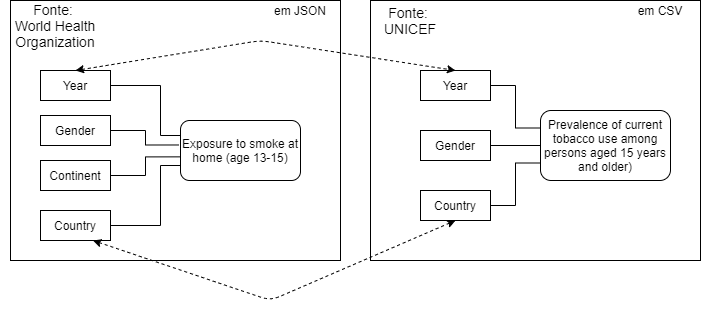

In [19]:
# script para mostrar a imagem baseado em um código Base64 para imagens (assim, a imagem fica associada ao notebook sem precisar enviar um png)
from IPython import display
from base64 import b64decode
base64_data = "iVBORw0KGgoAAAANSUhEUgAAAr0AAAE2CAYAAABsuypeAAAAAXNSR0IArs4c6QAACMZ0RVh0bXhmaWxlACUzQ214ZmlsZSUyMGhvc3QlM0QlMjJhcHAuZGlhZ3JhbXMubmV0JTIyJTIwbW9kaWZpZWQlM0QlMjIyMDIxLTA4LTIxVDIzJTNBNTIlM0EzMS4yODRaJTIyJTIwYWdlbnQlM0QlMjI1LjAlMjAoV2luZG93cyUyME5UJTIwMTAuMCUzQiUyMFdpbjY0JTNCJTIweDY0KSUyMEFwcGxlV2ViS2l0JTJGNTM3LjM2JTIwKEtIVE1MJTJDJTIwbGlrZSUyMEdlY2tvKSUyMENocm9tZSUyRjkyLjAuNDUxNS4xNTklMjBTYWZhcmklMkY1MzcuMzYlMjIlMjBldGFnJTNEJTIyWGhnQ0ZCZGRrUV9hWnNZYWYyNGYlMjIlMjB2ZXJzaW9uJTNEJTIyMTQuOS44JTIyJTIwdHlwZSUzRCUyMmRldmljZSUyMiUzRSUzQ2RpYWdyYW0lMjBpZCUzRCUyMmZmOXZWdjd6c29Wd1RYVVFkbGFFJTIyJTIwbmFtZSUzRCUyMlBhZ2UtMSUyMiUzRTVWcGJVOXM0RlA0MW1layUyQndGaSUyQkpvOFFRc3N1UzVuSjdCYWVPcW90YkhjZEt5c3JKT212NzVFdHh4YzVJVFJ4N0FJUFFUcTZmJTJCZVRqczZSQjhaNHR2ckk4RHo0bTNva0d1aWF0eG9ZVndOZEg5b1clMkZBckJPaE9ZMmpBVCUyQkN6ME1oRXFCTlB3QjVGQ1RVb1hvVWVTU2tWT2FjVERlVlhvMGpnbUxxJTJGSU1HTjBXYTMyUktQcXFIUHNFMFV3ZFhHa1NyJTJCRUhnJTJGeTJjRmZVZktKaEg3QWxhSVp6dXRMUVJKZ2p5NUxJbU15TU1hTVVwNmxacXN4aVFSOE9UUlp1JTJCc3RwWnU1TVJMemZScllmMmszRDE5dmI1JTJGWCUyQnZPZDk3QzYlMkZIb1Ruc2xlbm5HMGtHdVdrJTJCWHJIQVJHRjdGSFJDZmF3TGhjQmlFbjB6bDJSZWtTdEE2eWdNOGl5Q0ZJeXU0STQyUzFkWjVvczNvZ0RxRXp3dGthcXVRTmhoS3c5UWJUTEw4c1ZHQVlVaGFVd05kdEtjUlM3ZjZtN3dJV1NFaGtYb0dTM29DU0hjR3dsMDhVRmxXR3klMkY1JTJGUWZPQ3N5Umw5QVZVUU9aOFZSUkN5aGYlMkZyNkdTckpCMyUyQkkzbGhWOG9BN3JxMmllQ0kxaTNybjFtUG83REg1aUhOTTZydzNLeUtXUnRGT1dCR25oVlF3bG45RDh5cGhGbElJbHBUTVJzd3lpcWlYQVUlMkJqRmtYVkFiQWZtbFVHb0llJTJCTkNGc3hDenhQRE5GS2lTcHBqc01KNW1SVUlOYkRDYW9zVVE0VVVaQWI1UDZlZjc5NnVHa3p6WlRYWVRYdXp0YTJKRkxDSkI0ZTR6RkxHQSUyQnJUR0VlVFFscURwYWh6UyUyQmxjNnVjNzRYd3RMUkplY0ZyVkhsbUYlMkZFRTJGJTJCbEhrVDdYTFptOVdwWEtydFo1Sm9ZRlAlMkJROWlFeld6TXF6UmJNMFY3VHpMb1F4SzBnQmt1dFE0RlJTcTFqMWJxVUNTSFRCWExJRFRVY2FXY3g4d25lWkRlZlhObXVUJTJCdE5lWUlGNFhhb3dwMkhNazlJZzkwSlFqTEF4QUhJRTNiQ3F4dSUyQkYlMkJtaG8xYWlYemFBZzRtWlZCM0JUTmFZbjVPYVpkcTRocTBKUWNmOXFoYUhReVQxaElRQW16cWplc25aNFBOWWVkbWdablJEakFPMm1oOTI1cGxYNVpHdjJiajc5SnJ3WUhmazBVNDhmYzFnOXJ1cTNrbXd0c2xXTlhjYzRpWnolMkJXRW5uM1ZqSmtwdFg0UlVqRVZ6aW42c1RhYzgwMnE4empZWiUyQkF0UG9LSmZueVdwT2t3VWpxWTh2dERDRCUyQjdGWXRwaHFBQVBDdnclMkZDWHdkbnlqaEQxaDhLb3d1JTJCb3BNNHFvWlZBMXB2Y0VuMGhzdHdhMzRxVW1GOUpKanRRT28wTHYwbW9KT2ZvSTZLbE5NQWxORWFVS3J6OWhHT0M5SSUyRnFIUmtkUXpWU0lGcVRHTWV4a1NhcWw2aFpYZE1ySHk3VjlCYXhIblhmY0xLUUIxalpTcFFkWTZSdFVkNDQ4U3hSM1g3cFdHbThmUmZCYTAzRTJVYWFpJTJCcjRhUlJKdFRFMWRZandQJTJGYzNZd24xJTJCOHUxR3ZWWXpWTm9WNnRRZjFtVyUyQm8zT2cza3ZMVWdJN0lIZSUyRnBQVyUyQkkxZSUyRnRQaHltOW15Qk5vOUxma2M2M3hHSk9wSE96UHpyJTJGJTJGZU1rZXl2ZDJHSVFUcVAwZkpvbDQzN1BDT1JJN0lwd0EzMkNIM2ZCVWdCRWRPSWJkbDBSb2xna2FZQmlSbU5mSUVSWVF1TkVTSHhnZ3k2QzcyRER3UDlPWmJFUTBRaDh6TzRqRjQ3aVpEWlkyS1pycnRPYTM2UTY1TDJJWEZpam5rVXVkTlVmNkVua29nN1ZCb091b0RMVWoxdjY0b3NyV0kyNnhzcFNzRkl0WVdFNTNBZ25TZWdDR0I1T2dzM0oxZlRZVkxKSWolMkJXeUZ4JTJCYm5QSmJFOXBwQ3hPd01GeWRXeXFXcGcxVkRCMDZycUhMJTJGYzVmTm5RbHRWc05hczlscjNzNFVDTDlaaDVMbEt5ejlueUZVanF5OUZwSDlSZXhEQWlsbzljJTJCWmRTJTJGTmpHMXlpZHU3VHhOR09wMW9KMnRvTzI5RlNxdnJyM2VDV2p2dDdFdHZ0MXBkb0klMkJjczZyRkViMW8zWGZ2V0RidFJzQ2Fta3YxS01pcHJaelhsWjlYdlpCZXdleXhhZXFXZlhpazE5ajhoTSUzRCUzQyUyRmRpYWdyYW0lM0UlM0MlMkZteGZpbGUlM0U8DnXUAAAgAElEQVR4Xu2dC/hVVZn/39JJMQUbKFEMiUrISySZqUAiOmClafBPpgBTKREhRhpRQ7mIQiokDoKFeStgAgvL1BRHxQLNiFDSHEwlZMS84AygopbG//muzjqt32Lvc/bZ17XX/u7n+T3KOXvdPu8663zPu9/1rndJ9GtH9Ft5JwmQAAlUlsC7Chg51+cCoLNJEiCBchFoZXHesWMH19VymZe9JQESyJPAu96lltRW1tW0usf1OS2SrIcESMBLAlifW1mcuah6OQ04KBIggbQIUPSmRZL1kAAJkEC6BCh60+XJ2kiABCpOgKK34hOAwycBEnCWAEWvs6Zhx0iABMpIgKK3jFZjn0mABKpAwCnRu2jRIhk+fHgg95UrV0qfPn0S2QT1r1+/XiZNmpSoHhYmARIggTACFL2cGyRAAiTgJgHnRG+WopSi181JyF6RQDMCDz74oFx66aWCz3DHjh3llVdekWHDhsmyZctU0UGDBtXf03U9+eSTMnToUFm7dq16adq0aW1+8KI+1KvrxD0oM3XqVJk7d65qJ85F0RuHGsuQAAn4QMB2XtoOS6y7kydPrg9Vv4+1d9y4cTJnzhzp0aNH/f2w1+OyKp3otb/sFi5cqL78cAE2vuC2bdsm8+fPV6/p901DjBo1SmbPni3t2rVTZbR3uVevXrJkyRIF/I033pDx48dLv3796vXHhcxyJEACyQiYohc14TM/YsSINp/9BQsW1AUs7h8zZkz984wyWGw3bdpU/+zrxddcQyh6k9mJpUmABKpLAHrKXIe1XsPTdTypt9dg7ZiYN2+e9O7dO1Bzoc4VK1bU1+2kdEslejVA/WVn/1sLWP3Lwf7isz29Nkzbm5QULsuTQNUImN5V0/uKzxYWw/bt28vMmTOVZxYLIYQpfqiawjOImfnZ3Lx5804eAXNx1Ysn1gkzJEr/kNWvYwF+9dVXVfvau0DR+3f6DDWr2ieX460iAayrffv2VUPXzkD8Pxx+WEevvfba+vqMp/Dw0AY9VUMZW+BqnnrtnzFjhkycOHEnRyLWYVz4PrA1WRbOR+dEb1BMr+mttRW/+WV49913t/lFYBvBFL14b+zYsepRpulKhwG6d+9O724VVwCOORGBRr/q16xZoxZX/CDVonTDhg1qkVu3bl2b0IVmonePPfZQizKe5gTF+jcSruYCqz/raE+HVVH0/kP0MtQs0ceBhUnAaQJm2EDXrl3VmtqlSxc577zz1P/jwhNxvXZDhw0ePDj0CXgUp6H+MW2HmmlQdihDGuuxbQTnRG+jhdb8wjIh6Ri8VkSvHe9ngmnmdXJ6JrNzJFAQAXvRMxcsW9iaPy6jLGxBC6rppcCQzdiwsLhc84ev7sMJJ5ygfuTC09CpUyfG9NY8vc1EL0PNCvqgsVkSSIFA0JNuPI2zPbL2+hzmGNQeXR06GtZFe90wBbD9NC6LfViVFr1BQdMpzCVWQQKVJGCLUEDQcfIIScCCqhfENESvCdn0EOD1VkQvBK9esM8++2y54oorKr+RrdmXDUPNKvkR56A9IhAUwoTQhRtuuEE9edNhYK2IXnOzcRRUQeELeu0555xz6s6IpJm7zL6USvQGBTQnCW/Q3p00gUYxNO8hAR8JNPqlb78XRfSa95ifc3iN77///jaZGEwPQSsxvTqUSZdHzPH//M//UPSGpI9kqJmPn1yOqYoEwn7Y2t7WqKI3LKYX5SGk/+3f/k2J6enTp7fJjGP3Q6/1o0ePlrvuuiu1DWzaxqUSvVG8C2bMb6OYXgBottOwih8EjpkE4hII+rzpnbwQqq16es3F0PzBu3379p08APam1ajZG8z4fR3y1Llz553Sn7XCxIeUZc08vQw1a2VG8F4ScI+AHT+rMyvo8IZWPb2NNJVOPmCvG7amQx1m+EMWoaalEr02EPzbTlnWSPQGfamF5YzLYtege9OePSKBdAmYsfJmCsA4nl79GcSGNbOuoHXAfh/3RMnTa29atX8Ix6FD0TtXWt1fwVCzODONZUggGQEzJE1nZdAbheOIXi18zYQEtnC1NVeQsMU9S5cubZNyMtlI/1HaKdGb1qBYDwmQAAkURaAKopehZkXNLrZLAiSQhABFbxJ6LEsCJEACFoEqiF6GmnHakwAJlJEARW8ZrcY+kwAJOEugCqIX8JulLGOombNTlB0jgcoSoOitrOk5cBIggSwI+CB6s+DCOkmABEigaAIUvUVbgO2TAAl4RYCi1ytzcjAkQAIeEaDo9ciYHAoJkEDxBCh6i7cBe0ACJEACQQQSid6wtF46DYY+FlQ3HLTjN4pZwpIe67J2vjmzTpQdO3asOqGpR48ebZqL25+gPtt5RM0202wnCi/eQwIkUBwBit7i2LNlEiABEmhEIJHoRcVBSczx2u233y4HH3xwm1OTghKaRzEPRW8USryHBEjABQIUvS5YgX0gARIggZ0JJBa95vGgHTt2FHh/p0yZIieffLI6gUkfOWcL12Y7f1966SVZtmyZ+rvzzjtlzpw5SkDrI4PNBMcTJkyQtWvXqntsb24rnl4zGT5QjRo1qs0ReGYiZ7yvkzlj3Nqbiz6OHDlS9RsXvN0bNmyQO+64Q/178eLF6r9ZnDTCCU4CJFA8AYre4m3AHpAACZBAEIHEotcWlfqc5QsuuEAuuugiCTrVAx0ZNmyYeg//tXM+QkDOnDmzfhqHLZj1cXmzZ89WYxo/frw8/PDDgad3RBW9up5+/fqpPuEyPdP2saa6TxDhELrNwhtwQokO9wg6IpXTkwRIwA8CZRO9+se+XqtNK5hODX1SE97H2tuuXbv6rbbzIyiky3YqBP34RznzNCezL9OmTVNrre18MO+hM8GPzxBHQQJZEUgserU41Md5YkG6//7760Jw/fr19YUKnl8slrfeequYORxRh7loNjrCsmfPnkqUml7fZjG9uF97Xm2Q2pu7Zs0a5Zk2F/NGgtkWxc1Eb6OclVkZl/WSAAnkT8B30YtjoW1x2Uz06iOh8VROOxVsxwEsFRQuZ1vQPtI6fwuzRRIggbISSEX0mgsVvKMDBgxQYQja63vJJZfIrFmzRAvjoNhe3IvNZnPnNj63vVOnTmKf095InEb19EKIB3kYevXq1caDrBdvhFPg0t4Hit6yfgTYbxJIl4DvordLly6ydOnSNutiI9ELungaZz5F08RthwVFb7pzkbWRAAm0JZCK6NXiFmL0sssuq8fx6vjer3zlK/K9732vHurgqui1vc8mKlPs6jAFcxwUvfxokQAJgIDvohdhEHiat2nTpvqTsUaid+PGjTs5KsJmCkUvP0MkQAJZEkhF9Gpx+5GPfEQQJmCGCEAY7rPPPrJ8+XLlxTU3fZn3ZRneECVlGfqNvmLRRR/tK2gxpujNcmqybhIoJ4EqiF4dZqb3ZTQSvc3WVtPKjWJ6zT0Rffv23Wly6Kdu5Zw17DUJkEAeBFIRvegoBOAf/vAHOemkk+oxW3hdbzowFyR741rQRrZGMbCmV1U/OktrIxse3SFeWPddC2E7zlgvzgxvyGOasg0SKA+BKohehK+ZG3I3b97cxmlgrtGtil69DyTM4ozpLc9ngT0lAdcIpCZ6wzIS2IJWA2iWsqzZxi8zZRk2ViDGLGnKMrtPZkoye+cxxC5ilLH5DQu8LYp1/7DhA1ez8bg2MdgfEiCBeASqInq1swNhDkOGDJHvfOc79SdlpuhleEO8ecRSJEAC6RNITfSm3zXWSAIkQALlI1A20avFq95obBIPeqpmpjbTjoK9995btmzZEih6UV/YRjY7HSVjess339ljEigTAYreMlmLfSUBEnCeQBlFb9CTOvspXVg+Xx3CFnRYj9630ShlWbdu3er7QCh6nZ/e7CAJlJoARW+pzcfOkwAJuEagjKIXDO10jHhNbx7D/zc6xALhXBC/eiNw0OEUdvgY6rTz/TbayKZF9bp163bKqe7aHGB/SIAE3CRA0eumXdgrEiCBkhIoq+gtKW52mwRIgAQiE6DojYyKN5IACZBAcwIUvc0Z8Q4SIAESKIIARW8R1NkmCZCAtwQoer01LQdGAiRQcgKpil47Hsvc2FAUp6DT31rtix3LZu84brU+3k8CJOAvAYpef23LkZEACZSbQCqiV4vCDRs2tDnRTO/qNTdDlBFXow0cZRwP+0wCJJAdAYre7NiyZhIgARJIQiAV0Ru0U1d3yj6eUh9LfO2116pblixZIjjNRx8rOWrUKGnfvr3stddebU5GM4+dtFPjrF27VrZt2yY4pAKXuSNYe3rPOeccdVLcsmXL2vBCe0irgwu5JHUdup7Bgwe3eR11n3DCCaounNyGk4mCDq7Qp7rBK4xjkI899lhBW7hc8IAnmTQsSwIkEE6AopezgwRIgATcJJBY9GrB169fvzbHD+vh2l5SO7WNTpMzb948JSDtY4vt/JE6tAD3QljqkArzXPYxY8YoMd2jRw91NCYuLUJ1v8x2e/furYSteQQx6p05c6aqp2vXrup9nZTdDG+wy+rx6rr0vToXpRbXZltuTg32qgoE3nnnHXWoQMeOHdVwcboWPnNbt26VT37yk4L5jev111+X9773vVVAkniMFL2JEbICEiABEsiEQGLRGyW+FcJTn/Zji1A7GbktGoNGbdZhe5nt/gSJ3mZCHW1CFI8bN04dbdxI9OJetKHzU9plO3Xq1MYrjPcbecYzsTIrrTSB//u//5P//u//Vn8jR45ULHBk7JVXXil/+ctf5LTTTpP/+I//UK9fd9116mkInr4ceeSRcsUVV6jX8d9LLrlE9tlnHznllFPqT0d++tOfqh+X+Ntll10qzVkPnqKX04AESIAE3CRQuOg1BbFGFCRU7cTp06ZNq3t6V6xYUT/RJ4roRf3waOnTgkzT4L3Jkyerl3r16tXU04s4ZrN9lNMhDVOnThWKXjcnvo+9euGFF5SwRfL+0aNHqyFef/318u///u/Ss2dP+djHPiY333yzen316tXywQ9+UInYqBe8vy+//LI8++yzctxxx6liF1xwgdx2223qRyLm+5QpU+rtajH8gQ98IGoTXtxH0euFGTkIEiABDwkkFr3NvKZB4Q3gqMMNmoleU+zqEIYknl54WRcsWNDGM4v+aLGrY3w3btwYydNL0evhp8LxIUF0QthC4J577rmqtxCeX/va15SwxZ+OTce9BxxwQOYjQpgEPqsHHXSQauvMM89U//7jH/+oPMSIqccFj/GBBx7otXeYojfz6cYGSIAESCAWgcSiF622upHNFL3NwhuCzmKPK3rt+GFNzPTMwjuFi+ENseYTC6VI4KmnnqqHJcCjiuuhhx6SU089tS5uEX6D68UXX2zJa5tiN5tW9dJLL4n29p5//vnqs4U/fI6/9KUvqfJ43RTDZfYOU/Q2nRK8gQRIgAQKIZCK6G0lZZkdutBsI5stqPXGtVbDG3T2BmxGQ+YF87JDIvS/8bg4rY1sOtNDsx8JhcwCNloYAXhIdbwt/qtDayB4kSVEe26xqRIXNp3tvffehfU3zYYxdh0HfPnllyuvMNaD6dOnS//+/VVT8Bjjh6gWxNqTnGY/0q6LojdtoqyPBEiABNIhkIro1V2JcjhFULyuztiAenTKMsTTQpwGpQPDpjgdonD33Xe3iakNi+kdMGBAPS2aiU6nD8PjYp0WDW0jmwT6qkWyKba1gI6assxMb0bRm87ELVst27dvbyNuIexwIU72qKOOqovbyy67rGxDy7S/iEnWYnjGjBly8MEHq/ZOPvnkNp5hZI9x5aLodcUS7AcJkAAJtCWQquhNC25QnG9adbMeEsiSAPJFP/744/UNZdpDizYPO+ywurjFDyedJizL/vhaN7JGaDEML7EOh0AqQ+0ZRpYJbODL+6LozZs42yMBEiCBaAQKF712+IIZS6vja6MNhXeRQL4Eli9fXhe3CEtApg5cSPWlsyXAI1mE8MqXhButIZfwmjVr6hvosGmuJkCVDbQYvvDCCzP9wUHR68Z8YC9IgARIwCZQuOi1wxd0mjAKXk5WVwgghMbMloA4W1yf+cxn6p5bHOTg0iN2V9i50A+dWUJnk9CbAuGV//CHP1wPk7jxxhvr3TXjjVsdA0Vvq8R4PwmQAAnkQ6Bw0ZvPMNkKCTQn8POf/7wed4sNVBC1uD772c/KRz/6USVw4THEkdK8/CCArBc6TAIp33A988wz8pGPfKSeVg3p4HDhkI+//vWv9VCKMAIUvX7MDY6CBEjAPwIUvf7ZlCNqQuDHP/5xPSxhyJAhgj9cOJkMhzXo0ISjjz6aLCtKwPQOf/GLX1QUHn74YTnxxBNVyASySWADLi54kHG/PpWOoreik4bDJgEScJ4ARa/zJmIH4xJYuHBhPSzhX/7lX+Tss89WVeGEsnbt2tU9twhN4EUCUQkg7zCErg5nwRMCnX8Y8+y//uu/UNW7RKSPiLwbulhEXopaf4L7duzYsSNBcRYlARIgAb8JUPT6bd9KjO6GG26oi9sjjjiinusWu/r/8pe/1ONuDznkkErw4CCLIaC9w7W0ahC9Z4rISBHBiTf3iMhXaj07pSaKIYbx905KPaboTQkkqyEBEvCTAEWvn3b1clTf/e536zG3CEG45ppr1DixAenll1+ui1vE3/IigaIIhIQ37IOD82p9wvF6iJ2BGF4mIv9We/3rIgJXrRbDrXqHKXqLMjrbJQESKAUBit5SmKlanbzppptU/CROKNtvv/1k8eLFCsDtt9+uNhnpU8q6du1aLTAcbSkItBjTu4vh6YUYhhDG310iok8qmVi75481QfxECAiK3lLMEHaSBEigKAIUvUWRZ7tyxx13yE9+8hMlbvfcc0+57777FBUI3kceeaQec9u5c2fSIoHSEGhR9EYZF9JKHFgTw78Qkfm1QrNF5G3DM/wrxvRGwcl7SIAEqkqAoreqls943Gae09/85jdy9dVXq7hbvP773/9etf7000/LL3/5y7rn9n3ve1/GvWL1JJA9gQxEb1inERusPcN3iMhSiN7hw4fLe97znvphHDr7RPYjZwskQAIk4DYBil637eN877Zv3y577LGH6uf69etlwoQJynOLnKZ//vOf1es4BAA73HVYgr7f+cGxgyQQg0COotfunQpvWLFihcougb8vfOEL9SwTAwcOlN13312dHIgTBLt16xZjdCxCAiRAAuUlQNFbXtvl2nOIWO2JffXVV+XLX/6yErebNm0SnKqnj3tFDlwtbnfZBeGKvEigWgSKFr1htJ944gl1EMedd96p0vbp47F79+4tu+66qyC7CQ7o0Pmpk5xKVy2Lc7QkQAJlIUDRWxZL5dTPF154QR3QoEUs8o4iLGHr1q1qE9n73/9+1RPtuWWmhJwMw2ZKQ8BV0RsGEHmH8WN1t912E4RCdOzYUd36wQ9+UHmD//mf/1lmzZqlTiXEhfs/8IEPlMYe7CgJkAAJaAIUvRWdCxs3blRfchC4uHDkLjy3mBAPPPCAHHTQQer1ZcuWKc8tMyVUdKJw2C0TKJvoDRsgPL2/+MUv5O2331ZiWF8Ij4BXGEcyw2u89957q7fgSdan0rUMjQVIgARIIAcCFL05QC6yiaeeekreeust9SWF69Of/rQStx06dBCcWHbMMceo1yF0IW61CC6yz2ybBMpMwBfR28gGELivvPJKPV4Y4U9HHXWUiiOG8MXTIX0hxhiv0Ttc5lnNvpOAHwQoej2wIzwx+JLBAQ3HHnusGtGJJ54o9957r3Tp0kVwMtmXvvQl9fpDDz2kxC0zJXhgeA7BSQJVEL1h4PWpdPpJEWKIzzjjDCWGsYEVT5hwbd68WW24gximd9jJacxOkYCXBCh6S2RWZEqAlxaxtaeeeqrqOb5Qbr75ZiVkx44dK+ecc456/Xe/+516jZkSSmRgdtULAlUWvY0M+OKLL9afJD344INy5ZVXKjH83ve+V61XuOBBxg9zLYbpHfbiI8FBkIAzBCh6UzTF8ccfLwsWLJB99903Ua14VAhxi7+RI0equs4//3yZM2eOErKnnHKKTJkyRb3++OOPq13Y2H3NiwRIoHgCFL2t2cDMEvGzn/1MbZKFGN5rr73k7rvvVpX96le/aiOGtSe5tZZ2vvu1116Tr3/96/KjH/0oaVUsTwIkUAICFL0pGOmxxx6Tr371q0qkLlmyROXGjHIhUwLCElBu9OjRqsjMmTPl0ksvVeL2U5/6lMydO1e9jseEBx6IQ5l4kQAJuEyAojd969xwww313MPt27dXzgVcS5cuVSc4as9wv379Wmr8uuuuk3HjxskRRxwhP/zhD5m7uCV6vJkEykeAojehzb73ve+pkAIkhcdijNRe9oU4Nu25Pffcc9XbCEnAQQ46p+38+X8/WRT3MlNCQqOwOAkUSICiNz/48AzrgziQReKqq65SjWNdxkmQWgw3OpUOB3bggt0ggkeMGJHfANgSCZBArgQoemPixmMxeHexWQwnjuH63Oc+J6NGjVIC94ILLlCvIaUPXtPiFiEKuMz4tphdYDESIAEHCVD0Fm+UlStX1sUwNu1+61vfUp3CU7Tf/va3dTGMwzggiCGece25554yZMgQgRMCKR15kQAJ+EWAojeGPa+//nqZNGmSOmoX6cBw/dM//ZM64hP5biFwEaaAyzzJLEZTLEICJFAyAhS97hoMDgntGcYhHBC9Z511lorphSMDF8QuDuGBQD799NPdHQx7RgIk0DKBUohefTpYy6OrQAGEVfAiARJwhwBFbzJbcL0P58f1PtncYmkSKI3ode3DjkMf7rjjDlm8eLGsWbNGeQdef/11tdkMnoQ8LhjPNS55jJttkIDLBCh6k1knz3UNm4VXr16twhqQ7xzHLsO7i83IeGLn0pUnF5fGzb6QQJoEKHpToImz6CGAccIZTjb79re/XY/pTaH60Cq4CGZJl3WTQDwCFL3xuOlSea1rkydPlunTp6ssOcOGDVNC94ADDkjW+QxL58UlwyGwahIonABFb8omwNGciBXL4+IimAdltkECrRGg6G2Nl313nuvaH/7wBzn44IOTdTin0nlyyWlIbIYEcidA0Zs78vQa5CKYHkvWRAJpEaDoTUaS61owP3JJNq9YmgRAgKK3xPOAi2CJjceue0uAojeZabmuUfQmm0EsTQLhBCh6Szw7+OVQYuOx694SoOhNZlquaxS9yWYQS5MARa+Xc4BfDl6alYMqOQGK3mQG5LpG0ZtsBrE0CVD0ejkH+OXgpVk5qJIToOhNZkCuaxS9yWYQS5MARa+Xc4BfDl6alYMqOQGK3mQG5LpG0ZtsBrE0CVD0ejkH+OXgpVk5qJIToOhNZkCuaxS9yWYQS5MARW8ggTfeeEPGjx8vXbp0kUmTJtXvCXvdtYnELwfXLML+kMDfU+IgM04BLHb4cEJjVusa1/sCZiSbJAHHCFQ+ewMOk8BpPBC9ffr0UeZZtGiRrFixQmbPni3t2rVzzGT/6E5WXw7ODpgdI4ESEKDoTWakLNc1rvfJbMPSJFB2ApUXvTDggw8+KJdeeqkSu7jGjh0rU6dOlR49eqj3+vbtq14fNWpUXQhrr8H8+fPbvId/wHu8ZcsWWbJkiaxcubIuptOeLFl+OaTdV9ZHAlUhQNGbzNJZr2tc75PZh6VJoMwEKHpFRAvYfv36yfr166V79+7K+/vkk0/KuHHjZM6cOdK1a9c2oRAQybjgITa9B7179w4MmchikmT95ZBFn1knCfhOgKI3mYWzXte43iezD0uTQJkJUPTWrAeBO3ToUOncubPy+Hbs2HGnMAd4CBYsWLBT2INeREeMGCFa9EJAQzhnedW+XLNsIpe6+/fvL8uXL8+lLTZCAlkToOhNRjhr0Yvecb0PthHX4mRzl6XdJ0DRa9gI3lvt5cXLEL/Dhw9vY8VBgwap1zdv3qxE8tq1a+vvI5RBi14IYB0jnNU0yOPLIau+m/X6Mo48WLEN9wlQ9CazUV7rAdf7ne2UF/tkM4SlSSA+AYreJqIX4Q5mZgfcbj4egzc3yNNL0Rt9UnKhjc6Kd7pPgKI3mY3yWg+CRG/V1/u82CebISxNAvEJUPQ2EL1mTC82tWGR3LRpk8yYMUMmTpwoOoRBb3ajpzfeRORCG48bS7lJgKI3mV3yWg9s0cv1/u/p9nxIe5dsBrK0zwQoehuIXrxlZm/QoQ2I9zVfnzZtmqoFoRGDBw9WG9no6Y3+seFCG50V73SfAEVvMhvltR7YopfrPUVvspnL0mUgQNFbBiuF9DGvL4esEfkyjqw5sf5yEKDoTWYnrgfB/PLgkkcbyWYHS5NAMgIUvcn4FVralwXKl3EUOhnYuDMEKHqTmYLrAUVvshnE0iQQToCit8Szw5cvB1/GUeKpxK6nSICiNxlMrgcUvclmEEuTAEWvl3PAly8HX8bh5STjoFomQNHbMrI2BbgeUPQmm0EsTQIUvV7OAV++HHwZh5eTjINqmQBFb8vIKHojIMtjncyjjQhD5S0kkBkBhjdkhjb7in1ZoHwZR/YWZwtlIEDRm8xKXA/o6U02g1iaBOjp9XIO+PLl4Ms4vJxkHFTLBCh6W0ZGT28EZHmsk3m0EWGovIUEMiNAT29maLOv2JcFypdxZG9xtlAGAhS9yazE9YCe3mQziKVJgJ5eL+eAL18OvozDy0nGQbVMgKK3ZWT09EZAlsc6mUcbEYbKW0ggMwL09GaGNvuKfVmgfBlH9hZnC2UgQNGbzEpcD+jpTTaDWJoEPPD00ojBBHw4J51fcpzdPhGg6E1mzRq/ZJV4Wjrr9Z5rsacTh8OqEyiFp5f28psAF1q/7Vu10VH0Vs3i/oyXa7E/tuRIwp+YvKsFODuy/qXZQl94qycEuNB6YkgOQxGg6OVEKCsBrsVltRz7HZUAPb1RSfG+zAhwoc0MLSsugABFbwHQ2WQqBLgWp4KRlThMgKLXYeNUpWtcaKti6aNPOqkAACAASURBVGqMk6K3Gnb2cZRci320KsdkEqDo5XwonAAX2sJNwA6kSICiN0WYrCpXAlyLc8XNxgogQNFbAHQ22ZYAF1rOCJ8IUPT6ZM1qjYVrcbXsXcXRUvRW0eqOjZkLrWMGYXcSEaDoTYSPhQskwLW4QPhsOhcCFL25YGYjjQhwoeX88IkARa9P1qzWWLgWV8veVRwtRW8Vre7YmLnQOmYQdicRAYreRPhYuEACXIsLhM+mcyFA0ZsLZjZCTy/nQFUIUPRWxdL+jbNI0fvKK6/IokWL5J577pFHH31UXnjhBXnnnXf8g+z5iHbZZRfp3LmzfOITn5CBAwfKsGHDpGPHjs6MmqLXGVNUtyNFLrTVpc6RZ0WAojcrsqw3awJFrcUXXXSRXHHFFTJixAg56aST5PDDD5cuXboIBBSvchHAD5VNmzbJ6tWr5fbbb5cFCxbIBRdcINOnT3diIBS9Tpih2p0oaqGtNnWOPisCFL1ZkWW9WRPIey1+4okn5LTTTpNDDz1ULrnkEunatWvWQ2T9ORPYuHGjTJkyRR577DH54Q9/KAcddFDOPWjbHEVvofjZOAjkvdCSOglkSYCiN0u6rDtLAnmuxRC8ePx94YUXytixY7McFut2gMDcuXPl8ssvV+ErRQpfil4HJkPVu5DnQlt11hx/9gQoerNnzBayIZDnWowQhtNPP52CNxtTOlkrhO/NN9+sQh+KukohemtfIkUxcrrdHTt2ON2/KJ3Lc6GN0h/eQwJJCFD0JqHHskUSyGstRgzv888/LzfddFORw2XbBRA444wzZL/99issxrc0otcHcZf2/MprgUq733Z9vowja06svxwEKHrLYSf2cmcCeazFyNKwzz77yPr16xnDW8FJiBjf7t27y4svvlhIVgeK3hJPujwWqDzw+DKOPFixDfcJUPS6byP2MJhAHmvxnDlz5JFHHqGXt8KTEN7eww47TMaNG5c7BYre3JGn12AeC1R6vQ2vyZdx5MGKbbhPgKLXfRuxh8WJ3hNPPFHOPPNMGTx4MM1QUQK33nqr3HjjjXLHHXfkToCiN3fk6TXoi1j0ZRzpWZY1lZkARW+ZrVftvuexFu+///7y0EMPMbShwlMNIQ5HH320PPfcc7lToOjNHXl6DeaxQKXX22I9vU8++aQsXLhQ7r33XkGqnG3btuUxNLYRg0D79u1VSpvjjz9ehg8fLj169IhRS3FFKHqLY8+WkxHI4ztl1113lbfeeiv04AnE/OIUr2XLlrUZzLRp02TSpEnJBtik9BtvvCHjx49Xh2T06dMn07biVH7ppZfK5MmTZdSoUTJ79mxp165dnGoyK4Pv2alTpwqyNDQ6hQ0HWOy2227y9ttvZ9aXsIopenNHnl6DeSxQ6fW2ONF77rnnqvixs846S/BorVevXrL33nvnMTS2EYPAli1bZO3aterR13XXXSeI/7r66qtj1FRMEYreYriz1eQE8vhOadaGFr0QuFp45iVG82onjqXQNxzyMHLkSGcdAVFFL8bfbB7EYRSlDEVvFEqO3lPUpEkbR1bjQEqcIUOGqNN+rrzySgrdtA2XQ30QwOeff746zWfp0qUq1Y3rF0Wv6xZi/xp5wbLOlNRsvQ8SvegvvJzY9Y/8vnoDFOpatGiRbN68WYYOHap+LA8aNEi9tscee+zktdV1wJOMe/AkCRccIUuWLFEhF6anFyLOrhcezAcffFB5M3EtXry4Xl4/ldIeWby/cuVKJd61oJ4/f74qp1+3bRF0X+/evVW/GpU1+6o9wWvWrFHHAGuvMMaMrBnnnXeeqg/rK8Z93333yS233FL/N/oW1qYWth06dGjTn549e9Y99NoGjby9zeZBVp9Sit6syOZQb1GTJu2hZTWOo446Sj7/+c/LxRdfnHaXWV/OBC677DK588475de//nXOLbfeHEVv68xYwg0CWa3F5uiatREkes3XOnXqpITovHnzlJi074fg3LRpkxJ62DAFkQevMe7DyW94/A6RjPsgAiHM8P+4tBhEeIMWcdrjbNYLMdm3b18lXLU47NKli2pHC0v8v+n5vPbaa1UbeB2iecyYMUpw2uFbdjv6PluQm0zNsaE+Le67devWUPTqPmuhrf+tf2QE9Revgf+ECROUyDX7i1jdKOENqKPZPMjqE0HRmxXZHOotatKkPbQsxoGQhu3bt6vH47z8IIDwFHhvXA91oOj1Y75VcRRZrMU2x2ZthMX0Yk8GRBaEJDy9SH0GgQcBaQpYU2iuW7eu/h7+3/R6mv2yPaAQvVr4aWEcVi9Ec1B5MybYFuZhYRT26/rf/fr1U9kuwuKNwSBobPbrdj9RL5ia7eDfjfqLHx02f902RW9Kq0azD0lKzZSuGl+4pD0OLE5HHHGEPPvsswxpKN2sDu8wHsUdcMABsmrVKmdj2rQHA46MAtDvyPrRdAFjYpM5Ekh7LQ7qerM2wsIbdF123CiEHbyu5qXDFSDQtHcXj+8RHmGKPB0ugLLYKGd6evFaWL3wFAeFDZxzzjmqfjMeGfU0E/K670Fj117bRqIXYnbFihU7bW5rJnr1hj1bbDfqL8JLTG+u2QZFb0of1mYfkijNmPEuuF9/KNLcGR428aL0L849aXCJ027aZdIeBxacN998U2bOnJl2V1lfwQTwSG333XevP44suDuBzdPT66JV2KcoBNJei/MSvWEeXLQP0YgT4J5++un6JjD7uzrM0xtWb1QxaYpZLb4baY6sPb1BYRxmvLEWwXa4hGnHoB8d9PRG+XS1cE/SD6L+JWgGjtuPRFroTuitFL3xKCa1r90qYnkvv/xyOeaYY+J1iKWcJfDLX/5SLrzwQqdjeyl6nZ0+7FgTApi78OJleaH+Rk8kWvX02vfjexgiTIcl6O9/M82X+V2NMDh4ZyH+GsX0mvXaoRJmHK8WljqmV4cCwNOMS79uxiWbvOPE9NohH7oPAwYMqMcOw+sdNM4g0at/LAT1F/XQ05vlJyRhwLMdq6K7GvaLyt4dGbZTUcfr6A8UPMcDBw5U+V8RQI8raLelnpx4X+88bbTDsRHatMVixmYMrT7tcWBXKUMbirJmtu3qEIetW7dm21CC2il6E8Bj0UIJXHLJJZm3n7boRYfNJ7n2U1wtiuHFhOjDZT6+R6aB0aNHy1133SUzZsyQiRMn1vP0htUb5umFoA3L0mC/rmOUbeDNyoflEDbDPEyBrzNJYJz4e+2119qI+zDRG9bfRp5e/QMCY9I/OsImVNrf+1Enrvcb2exfQGFgzF9n5s5K3N9op6L+taZ3cOJ+iN5Zs2bVf9UF1ad3nkY1VNB9RU2aJH3OYxy+cEmbsy/1uW5fil5fZhrHkQUB1z+/WYyZde5MoKh5UAnRa7ri7QBt/No64YQT2gSfm17gRjsV7Rx4+tcffu0hgbQOZm9UX5IPQ+3LNUkVqZXt37+/LF++PFZ9aU/+tOuLNSgWyoyA6/al6E1mepfWtWQjSb+0DxsVXf/8pm811piHsysq5UqIXjO9hglG74rUotc+9hCCuNFOReQANHdM2qI3Sn1RDeXSpEm7L2kvgmnXl8RGLJs+AdftS9GbzOau2zfZ6OKX9oWLL+OIb0mWBIGi5oH3ojcsphfQTdEbtrOyUfxKI08vAuLhYbZ3arZyTF+zj0ZRk4ait5ll+H6WBFya92GfBaYsiz8DXLdv/JElK+kLF1/GkcyaLF3UPPBe9GJqhWVvQA4+HUxu77jUsbqNdirqoG2EMTSK6dXB8IjjtetLMvWLmjQUvUmsxrJJCbg07yl6k1pz5/Ku2zf9EUer0RcuvowjmtV4VxiBouZBJUQvoNuxvPYOzzg7Fdu1a1cX1GgDmR+QC1DvgDWzN5inyUQ9pq/Zx6WoSUPR28wyfD9LAi7Ne4re9C3tun3TH3G0Gn3hEmccUZ+Qhp1MFo0w78qTQJx5kEb/KiN604DlWh1FTZq0Re+xxx4rDzzwQKp4fdjwkSoQjypzad5T9KY/sVy3b/ojjlajL1zijIOiN9ocKdNdceZBGuOj6E2DYkF1FDVp0ha9aeNziUvaY2N9xW2AiMoe848xvVFp7XwfP7/B7Hzh0uo47Jy6yP+KY4ARgrh27VqVe9Y8iAIHU7Rv316dyGm+Zz/txbHDCE3EFdQG8ueHvW7m7zXbMC3XaD8Q7gt6EozXw/Lt2rMCYx4+fLh6WT+57tq1q6oX4ZbXXnut4oOnzOvXr5fJkye34RGWD7jZ2QS6XX02wV577VXn2MqnvtV50Erdje6l6E2LZAH1FDVpKHoLMDabrBNwad6HfRYoeuNPWNftG39kyUr6wiXOOEwBCYo4ZEIfNmGfYBa0V0eftNavXz9V1szfr4WiPvQh6EhiHOCgXz/nnHNC20fIo74aiV5kfoIQheiGsL7oootk+vTpSszrbFO6X126dNlJVNonytrHC6MPOC8Am+01j8GDBytBrBmEnfyGso3OJtD9M0940z8eWpnhceZBK/WH3UvRmwbFguooatJQ9BZkcDarCLg07yl605+Urts3/RFHq9EXLnHGYQpICENzX4wpYPEexJz2/IaFRUBo6oxNoB+0zyasrP162AFYUUWvaX3zeGS9ZwieawhYU1DbM8YW6qa4N8emM1ZpAayFvpnlCmlazTSvZpy0KdbRB/P45Wiz+B93xZkHrbYRtj6rZ3ERrx1FxEoWBScik8Juc4mLi32xH2dpQ9mbGAszYMyGzQXbTokXs8pExaLG28VpJKhul+YaRW8cqzYu47p90x9xtBp94RJnHOY6sG7dujbC1lwPIXpNkWiXg9fT/h6whbJ+3/amhr0eth43Er0QsPp4YNS7cuVK0d5kHbKg2wsKn7BDE3AvwjW0R1uLWbsP9tkE+gAtlNfvNTqbwDxplqI32uc21l1xPiSxGipZIZe4uNgXLXrND3bJTBzYXYred0kRP76jzh3G9EYlFXyfS2tJspGkW9oXLnHGEdfTq4XrNddcI9/4xjfqp6QW4em1vbh6dph9Wb16dT3sodHssesKC8kIE73NPL2md5ie3h070v0kR6gtzockQrWlv8UlLi72pZno1b9sEeNlHxWND/0RRxwh3/zmN+ubBLRXNWyjgfm6/nW+xx57qDgq/cvbXmzxGAkX+DXaoKEnq/kL3968gJR5ptfAnuCN+pfGxoe5c+cKNn+YsWIbN24M3HDSqG96DD179lSxczjZ0PR2uDTXghYRit5kS2sa9jU3GqE3WTzdCRMxyUYfXjoNLln1rZV644yj1Zhe7TnVsa46Dlc7QGA7bHRbsmSJyp2PdcZ8Dyet4t8jR44MfT0optiO6dX5/oPy+Hfv3l21GxbTi+8bcy016zbnnj4vAJ7iqJ5etNsopjdM9GI9Z0xvK7M95r1xPiQxmypVMZe4uNiXZqIXAnLKlClqYcMjrg0bNtQ3OWCxGjJkiFrwzAVGizgcNKIXMmw0wKJqnuqHMrjsX9S26NWLIhYsu79hC57t6Q1bvMzQB7uM3T/0NcnGB71IYsewuZibXyZh47Fj4mzedrydS3ONojf9JTOpfcMOIzJjPdPoNUVvPIpx7KvXRrTYSvaGUaNG1eNhzWwHcBBgk5cZBhCUDSIsS0OU7A26rwhXwI8ufEegTayzWqjiB73tqAhyTsCZYF52VonRo0fLXXfdJTNmzJCJEye2GVdQTK/p6LGdJc3CMjRHOCLw99prrzF7Q7yPgv+/cH3mEmchS5uHrk/3JSym11wI8QGH8EUZ7am0RVijmDHz8RlSwthHT5seZC1szQ0U9oaBVjdh2DuPw47dDguJsO9P8jgMnnFzAbRj4qLG/pqP0/Ajg6I38ielkD0XkXsX8cYka0nY/Lc/h3HTNWlBotM1bdu2TYkYXGYKKu1p1GsJ3tdPc2wBExGL8xs4qzaOqOP19b6wz1rU8Sb5nEdtI8wpwY1sSQgWWLaoSRM2kSAeg66w+MtGcZlx37vsssvqXw7NPL26r2aYA16zxZkdc4VHX3o3rR1rpr0FWljrL8Ow8Ab7MZK50QJlgx7Lmv2xH82hjD0ePU7TOxHWv7gbHzDur371q4odUu/gi930WOg+hD1mNjd14F7dP4relhaYyovesJ30NkXz2HnM0zFjxqhH3bgapWtq9LgaZfFkKKg+PBnCj94kl0vrPceRhEB5y9prupnruNVRFTWf0W4pRG+rQKtyvysbevTRy2GCuJXXcW8tLjLQjI3eQ75D29PbaCMbPsS33XabagdhDggJsL847ZQ45u7gsB2+jTYWaO8u2gyLnWqUnsYUvVE9vTbIrDY+3H333fWNGFGPBLUZ0tMbe/Wi6H3yyTafKftpDxL1n3DCCW1iOO14/rB0TXg0bX/28W879rNRfbEt22RNTFJvEWVd+d4qYuxs8+8EKHo5E0ggJQJRRa+9geCGG24QiHcdtzthwgT15RglpvfUU09t82Vrx8zqBOPmBgpb9NqeadyLL1Wdc1LjiRPTa3tww2KOwzy9UTc+oI86fCNog0jQeEzRqzf+oR540+npbelDQdH75JNtcoya9Ox0TTqeUt8DQdwoXRNylJpPefSPMy16o9TXkjWtm4sSCUn6HObsoOhNm2r56itqPpfC01s+c7LHRRJoFtOLvt13331yyy231AP+8Zr2fmoB26FDB0GQv50nMSx7g7lRwo4b1mEPV111laxatUoJZFv04t9mCEJYKID2JD388MPqkaz29jbL3hDUP7RpZpdoJHqbxUHqmGjbU6vH3mw86D/uwQ+PxYsXqxhrXBDc2j4ImyhqsYw6p5m9ISqp4PuS2LdRnKEpes1Np2YvGm3iaeTpxa55O55ff56DDj6IQygJlzjtZVXGl3Fkxacq9RY1Dyh6qzLDKjTOpB+mqBuuKoTUqaEmtW/Wg6HoTUY4qX3DsjcEHU8LL63+oYm4WzydCAs50jvuUSYoBRVG3ay+JGSScknSdpplfRlHmkyC6goLnTPvDToRzd4fgScY2nGQdZ9bqb+oeUDR24qVeG8pCCT9MFH0um3mpPbNenQUvckIp2FfO5bXfspgP7XQwqBZuibzKQ+eTDz99NPqyQQuM3tDWH1JyKTBJUn7aZX1ZRxp8Qirp5no1U/uzM1kdpaSrPuYpP6i5gFFbxKrsayTBIr6MDkJw8NOuW5fit5kk851+yYbXfzSvnCxx6F/aLRyGJD+kbFlyxYV4oUUcbh09hszJK1ZWJYOY0N5nWou7EeRbT07m4Euj/u0KNXp7fbaay/1JCCsPyhjhrdBzKJ+e08H7tM5z/HE4cUXX6znyY1yWmeQMEZ9AwYMUBlGwsL37B+SWmwHpeVDvnak8MQVluGhqPlM0Rt/DWJJRwkU9WFyFId33XLdvhS9yaac6/ZNNrr4pX3hEiR6Gx0GpLNp6L0L2BSsTx7TG4TDDt9ptgE3LD0dNi2uX79eiUlzw7OZY7nZoTphJ5eFpcvTG3/Nk97CRK+eRXZ4g30Sobm3xJx5ZrmwE+GCePfr169+gJOZhcg8ZMnc04E29QFQ5mFJeL2o+UzRG38NYklHCRT1YXIUh3fdct2+FL3Jppzr9k02uvilfeESJHrNNHGN8qJrQaVPHtMirNnhOzpPurnREZk6wtLTmaI3qsVMsWeX1yLTPg7ZTm9nxpNHCbOzRW9QJhz9w8AcB+rW2YqwQfP+++/f6fRRpM0MSztpnywaxrFR6s2i5jNFb9QZzftKQ6DVD5NrcVDmo6Y8oDfbDBFlI0TQAm1mizAfc2Eh1YtsnPG1at84bSQpQ9GbhF5xHqBkvc6+tOvzPiqBsPAGnf3FFr04xte8ELoAwYZ1UotZvB90+I65+VAfDqKzeDRKTwexZm4IM8MWzL6EHaoza9YsdRs8xbhs0RuU3q5bt26qTR3OEEf02jYIiwvGd572wCKLkQ5tsNds1KdDRdatW1cPH8HrOk4e/29nKDHrCfv+KGo+U/RG/aTyvtIQaPXD5JLoTSoIWzVS0GYIsw9RTrXTXzadO3duE38WdjIc+phE2Ldq31aZJL2fojcZQdftm2x08Uv7wqWZp9cMG1i9enU9zMAk12zNDjt8x/b0RjkcKMyL3OhQnUae3qjp8tISveaBKiZDMHrppZfanKIZ5ABBGft7wPb0hqXla2SnouYzRW/8NYglHSXQ6odJfzCxKQAB+GvXrhXz16npQTA3SOhHP+3bt5eZM2eqX8T4ZY8jTe06wjYH2Au5Hf9k/mI2d6CbmwoQt7V169Z6ntCw/trmCtsMEXRf9+7dA9Pe6CNXzdy6iHtr9qVkPl5r9AgsaIq1at+8pylFbzLirts32ejil/aFS1hMb9hhQOajc71m6fAG7ekNO3ynWUxvmOiFp1aveWExvc0O1YkS02umy9Np8HTIBsbaakyvKVob5azGLNRtDxkypO6RtuOUNW/71MFGhyzZfWBMb/zPPEs6TAAbC1599VWxT9ox/53Ge1HqgGBt5cQfvTgAL04BQ4wThCt2BQdtLti0aVP9PuwWxqMvvWBt2LBBeTvxKEg/qtq8eXM9dszcHKAffWmz2kLQ9iSYGyDM/zcXIPsUNL1oYVxh4jLs133QL/ywKWh/6dg7fe0DPszHa/YGh2bT3PUvf4reZhZs/L7r9k02uvilfeESFt4Q5TAgvY7okxvN8Iaww4GaZW8IOlRHh0XoMISg8AazXvtQHfzw1/1Bn/H32muvBWZvCHOw4CAjrKvTp08XcwOd7a3VG+7062bIRVjmBNwb5pgwHTTmum3yRbo+fE+Cv53bOmrmi6LmMz298dcgljQIYCLpE8FqX/rqXfP/7X9Hfa/V+/BBjCN6gzZFoM/25gL9Cx5i1ozBMh/nmyLw7rvvDjy+1BaizUIbzLgw8xGZ+ajJ7lOSR2R6kQvbAWx+AOx2wjwG5pjjhjgUtVhG/cBT9EYlFXyf6/ZNNrr4pX3hEiZ6tfiMT8jNks08rkX1Osp3Q5Z9K2o+U/RmadUK1V3UBA5C3Gpf7F+8jUSk/Z4ZL9VI9AZtxrDzL9oeV/sXM8aKX+44JjlstzNEr85VqdmEHf+r32/k6cU9eH/FihWq3eOOO04Vsz23zRZQWwSjDore1BeIHa382Eu99ZQqbPXzm1KzzlfjC5cqiF47f28jj2sREy/o1MK8+1HUfKbozdvSnrZX1ATOWvQ28/RGFb32I6igftueXi02tXc0qqc3bONC2NRrJnqbnQyEeqOIXnuzA0Vv6osBRW/qSN2p0KU1NgkVX8aRhAHLFpelpRSi1368zQnzDwKueHZcWsha7UsjT2+zmN4ooteM6UX8alicrR3Ta4peHWOGtDuIBY4a04s60Efbq2x+hmzRa//bbCvss2eLXju/o10HY3ozWcW8Eb2Z0PGgUlfW+yQoW12fk7TFsu4SKGoelEb0+vBhT3v6FTVp0vCups3CrK9VLo1EL0Rqs+wN2hMbFt6ATQhhmwPMfttC0NwMhnCC0aNHy1133aU20ZkbLbDhYdWqVYHZG5qFNqD9IE+vuRkiTkyvrleHddh1MHtDJp8AL0RvJmRYqTMEWl2fnek4O5IqgaLmAUVvqmbMt7KiJo1vojdfqzVurdlmtqDSUcIPXBoj+hI3tAFlXZr3YZ8FdLMA5hS9BUD3qUmkHsz6QpiTr06sKHnNbb6NQsPsELcotkniUIhSf1r3FLWOU/SmZcEC6ilq0lD0ZmvsZoLQ3uAWxZubbY9bqz2OsDdbcGneU/S2Znve7TYBfLYgSrO8KHrb0k1b9KJ2iGVcyFPs6lXUOk7R6+qMiNCvoiYNRW8E4/CWzAi4NO8pejMzMysugEAen6082oiLzs66oPPz4nWkVMO1ePHi+hG8CH8znRAI40Kuduy70Mce6760ki8YGXjgzBg4cKBs27ZNhbThGj9+fD01qO6bzoyD98FWC96LLrqoYY7fuIzSKlfUPKDoTcuCBdRT1KRJW/Qee+yx8sADD6RK0NfHZ6lCKmllLs17it6STiJ2O5BAHp+tPNqIY147raIZWoCDGOyDiLp06VLfVBx0YJEtes0NzOYBSOirzmyDTc9Dhw6VefPm1Q88wvsQvTglDhcEtT4JEwco4dJlzDabPTGMwyjNMkXNA4reNK2Yc11FTZq0RW/a40i7vpzNyuaaEHDdvugfY3o5jctIII/PVh5tpMHezEADkWoeRKQ3/+IkUnhf9clwYaec2a+bB1YcfvjhddGLkzzNjEC6D/YxwGZ9yDBk5m3XY3c9xKGoeUDRm8ano6A6ipo0FL0FGZzNKgIuzXt6ejkpfSKQx2crjzbi2sTMWoM6dNYZiF5TjJo50xE3q8MZwkRv0AY3ne3HFL1hp3dq0auPRdbjwxHGZnnzuGKK3uBZQNEb99PhQDmXFo8kfUlSNm0B7oBZ2QV6euPOAWZviEuO5XL7QZn2ep+W6ewsOLanN0j05unpRVsIg0AcsXmFbYSj6KXoTeuz4Uw9Li0eSfqSpCxFrzPTMbeOpD1f0u44wxvSJsr68iKQx2crjzbi8DJF7x577KHCFnAhnjbM0wsPbFjsb5yYXrSnPce9e/du0wczplfnjkfsL8Ib7NMuUQ9jeil643wOnC7j0uKRpC9JylL0Oj1FM+lc2vMl7U5S9KZNlPXlRSCPz9auu+4qb731luyyyy55DStSO2Z2BWROQM5iZGpA1gY71tY80MfO3tC+fXs5+eSTE2dvQKfnz58vTz/9tOoLLjN7A0IbIJCDPL0Ip3A5e8M777wju+22m7z99tuRbJPmTd6FN5inWAFUlNOkmgE1T9qyj1dtVraV9812opTLY4GK0g/ck6QvScpS9Ea1kD/3pT1f0iZD0Zs2UdaXF4E8Plv777+/PPTQQ9K1a9e8hlW5dlwPbdi4caMcffTR8txzz+VuG69Erxa82EmpkzLHOdHEtkKrYjSuFVttJ48FKupYkvQlSdmg/nXo0EGeffZZPJ554AAAHzJJREFU2XvvvaN2n/eVhMCWLVvkgAMOkK1btzrbY4peZ03DjjUhkPZaHNTciSeeKGeeeaYMHjyY9siAQBlOZLv11lvlxhtvlDvuuCMDAo2r9Er0BglcezeljoVZu3atDBo0SMXjYMdjWPLp1atXy/DhwxVFPE7o1q2b2sU5Y8YMmThxoiBX3+TJk9X706ZNU7s4cSVtJ8pJKnksUFFnZJK+JCkb1L+jjjpKLr/8cjnmmGOidp/3lYTAL3/5S7nwwgvl17/+tbM9puh11jTsmAOid86cOfLII4/ITTfdRHtUlMAZZ5whhx12mEq1lvfljeg1896FCUbbE2wni26UfLp79+7Ke6zDG7TohcF0oPuYMWMEyaIRWG6mMYnTTpSJkLZYjNJm2D1J+pKkbFB/8MPjzTfflJkzZyYZEss6SGDChAmy++67q00arl4Uva5ahv1qRiDttTioPXwP77PPPrJ+/XqGODQziIfvI7QBeurFF19UDse8L+9Er04SHQTSDvg2T2DBSShByachoIJierXo7devnxK4+CCPHTtW7aK06zLbRUB8lHaiTITal2uUWzO/p3///rJ8+fJY7aS90IL3EUccwRCHWNZwt5AObVi1atVOaXtc6jVFr0vWYF9aIZD2WhzWNjZZPf/88/T2tmIcT+6Fl3e//fZTRyQXcXknerUIDYJp5+GzhWpQHr5moleLbLsueI3NC7tB4QWGII7STpTJkNcCFaUvSe7JYhznnnuubN++Xa677rokXWNZhwicddZZglRCV199tUO92rkrFL1Om4eda0Agi7U4rDkcqnD66acrZxGvahBAJoybb75ZEDZa1OWN6AXAsE1rOl+dnc/O9vRGEaN2eEOY6DXrMo1rZ38wU5+UeSNbkgmc1UKL2N7Pf/7zcvHFFyfpHss6QOCyyy6TO++80+lYXo2JoteBCcMuxCKQ1Voc1JknnnhCBg4cqGL0KXxjmatUhSB4sdfmnnvukYMOOqiwvnslesOyN0CAmik8dHYHO9Y2LdFrx/Sibd2HRvn+KHrT/Rzg8dmQIUPk0EMPlSuvvJLZHNLFm0ttCGk4//zz5bHHHpOlS5eqx2KuXxS9rluI/QsjkKfoRR8gfE877TS1RiMXLdOY+Tc3EcM7ZcoUtYb/8Ic/LFTwgq5XohcDsvP0mhka8H6jrAphoheiFRkcgrI3BHl6cUyg2Y4ObcDrjTy9Zjtly96Q5KOa9UKLUAfsFMbjcaTLgT2YziyJxbItC6GL7CpIZ4PwFMSAuR7SYBKh6M12frD27AhkvRaH9RwxvldccYXg+/Skk04ShD4gM5JrB1hkR96fmnHwxKZNm1QIw+23364cfhdccEFhMbw2We9Erz9Tp/lIilqgmvestTvyGAd+hOBHy7333qu8C9u2bWutk7w7NwI40QiPv44//nj1Y9M+az63jsRsiKI3JjgWK5xAHmtx2CDhsILjB4+/H330UXnhhRcEAopXuQjgh0rnzp3lE5/4hApfgQOviCwNYdQoess1n9r0tsgFKk1svowjTSasq7wEKHrLa7uq95xrcdVngP/jp+gtsY19WaB8GUeJpxK7niIBit4UYbKqXAlwLc4VNxsrgABFbwHQ02rSlwXKl3GkZVfWU24CFL3ltl+Ve8+1uMrWr8bYKXpLbGdfFihfxlHiqcSup0iAojdFmKwqVwJci3PFzcYKIEDRWwD0tJr0ZYHyZRxp2ZX1lJsARW+57Vfl3nMtrrL1qzF2it4S29mXBcqXcZR4KrHrKRKg6E0RJqvKlQDX4lxxs7ECCFD0FgA9rSZ9WaB8GUdadmU95SZA0Vtu+1W591yLq2z9aoydorfEdvZlgfJlHCWeSux6igQoelOEyapyJcC1OFfcbKwAAhS9BUBPq0lfFihfxpGWXVlPuQlQ9JbbflXuPdfiKlu/GmMvjeithjlaH+WOHTtaL+RYCS60jhmE3UlEgKI3ET6p8UtWiaels17vuRZ7OnE4rDqBUohe2stvAlxo/bZv1UZH0ZvM4lwPgvnlwSWPNpLNDpYmgWQEKHqT8WPpFAhwoU0BIqtwhgBFbzJTcD2g6E02g1iaBMIJUPRydhROgF9yhZuAHUiRAEVvMphcDyh6k80gliYBil7OAYcJ8EvOYeOway0ToOhtGVmbAlwPKHqTzSCWJgGKXs4BhwnwS85h47BrLROg6G0ZGUVvBGR5rJN5tBFhqLyFBDIjwPCGzNCy4qgEuNBGJcX7ykCAojeZlbge0NObbAaxNAnQ08s54DABfsk5bBx2rWUCFL0tI6OnNwKyPNbJPNqIMFTeQgKZEaCnNzO0rDgqAS60UUnxvjIQoOhNZiWuB/T0JptBLE0C9PRyDjhMgF9yDhuHXWuZAEVvy8jo6Y2ALI91Mo82IgyVt5BAZgTo6c0MLSuOSoALbVRSvK8MBCh6k1mJ6wE9vclmEEuTAD29nAMOE+CXnMPGYddaJkDR2zKyVD29Dz74oPTt27de58KFC2XYsGHJOhVS+sknn5SpU6fK3LlzpWPHjpm0oSvNY53Mo41MIbFyEmhCgJ5eTpHCCXChLdwE7ECKBCh6k8FMsh5A8I4ZM0aWLFkiPXr0kDfeeEPGjx8v/fr1y0T4UvQmszVLk0DeBCh68ybO9nYikORLjjhJwDUCFL3JLBJ3PQgTuLYwNT3Bo0aNktmzZ6sOQxyPGDFC+vTpI6+88oqMHTtWeXFx4b8dOnSQ+fPnq3+vXLlSevbsqYT0smXLZNCgQXLJJZfI5MmT1fsYw2GHHSaHHHJIXWwvWrRIvRfX6xyXSyvWyKONVvrDe0kgbQIUvWkTZX0tE+BC2zIyFnCYAEVvMuPEXQ8gbseNGydz5sxRXt6gC/cMHTpU5s2bJ71791ZCt0uXLnLeeec1FL0oM2HCBCVYL730Utm0aZMSyxs3bqyHN2zevLleN4QzxPWCBQvqonrKlCkycuTI0L41oxaXS7N6zffzaKOV/vBeEkibAEVv2kRZX8sEuNC2jIwFHCZA0ZvMOHHXgyihBqYQbdeunRKmELE33HCD+m+Yp9cU02Ydtug174O3+KKLLpLp06cLBDHagDcY7ca5avMqTtHIZfr37y/Lly+PfD9vJIGyEaDoLZvFPOxv3C85D1FwSB4QoOhNZsS460EUTy9CDFasWKG8rxCfWijPmjWroeg1N6s1Er32pjYI6QEDBsiGDRsUlLihDSgbl0sya7A0CfhFgKLXL3uWcjRczEtpNnY6hABFb7KpEXc9CIvpNT2u69atq4ccNPL0mgIao4kreiGQb7vtNgUkSWgDRW+yOcXSJKAJUPRyLhROIO6XXOEdZwdIIIAARW+yaZFkPQjL3oC43UmTJinPbqOYXn0fPMIzZ85UWSCSiF4Ibnh3u3XrVvcux6WThEvcNlmOBHwjQNHrm0VLOB4u5iU0GrscSoCiN9nkSLoe2Hl6p02bpgSvvoKyN+hQBwjitWvXylVXXSWrVq1qk71B5+I1wxu2b99eD1lAvO7VV1+9U85ehDh07949UWgDPb3J5hRLk0CpPL15BPCXdUrs2LGjrF2v9zvpl1zpAXAAXhGg6E1mTp/WAzP1WVhGiai0fOISdcy8jwTSJlAKTy8/7MFm94WLL+NI+8PJ+spJgKI3md18WQ90KIVOdZaMCjeyJeXH8iSgn5i8qwUUO4rwLPqyCLbAOdKtvnDxZRyRjMabvCdA0ZvMxFwP/HZyJJsdLE0CyQjQ05uMX6Glffly8GUchU4GNu4MAYreZKbgekDRm2wGsTQJhBOg6C3x7PDly8GXcZR4KrHrKRKg6E0Gk+sBRW+yGcTSJEDR6+Uc8OXLwZdxeDnJOKiWCVD0toysTQGuBxS9yWYQS5MARa+Xc8CXLwdfxuHlJOOgWiZA0dsyMoreCMi4TkaAxFtIoAkBhjeUeIr4sgj6Mo4STyV2PUUCFL3JYHI9oKc32QxiaRKgp9fLOeDLl4Mv4/ByknFQLROg6G0ZGT29EZBxnYwAibeQAD29/s4BXxZBX8bh70zjyFohQNHbCq2d7+V6QE9vshnE0iRAT6+Xc8CXLwdfxuHlJOOgWiZA0dsysp08vclq8Ld0EXny/aXJkVWRQCVieu2z2BcuXJj4HPSwyYJTeKZOnbrT+etZTC5fxKIv48jCxqyzfAQoesths2eeeUa+8IUvyFNPPSV//etf23R61113lV69esnq1avLMRj2kgRIIBIB70UvBO+YMWNkyZIlgrPP33jjDRk/frz069cvE+FL0Rtp3u3k2aEHo3VuLOEmAYpeN+0S1Ku3335bTjrpJFmxYoW8/vrr6pbdd99dPv7xj8tvfvOb8gyEPSUBEohEwGvRGyZwbWFqeoJHjRols2fPVvAgjkeMGCF9+vSRV155RcaOHau8uLjw3w4dOsj8+fPVv1euXCk9e/ZUQnrZsmUyaNAgueSSS2Ty5MnqfYA+7LDD5JBDDqmL7UWLFqn3UCbO5YuH1JdxxLEhy/hHgKK3HDZ97LHH5Pvf/75cd9118re//a3u7f3ABz4gjz76qOy7777lGAh7SQIkEJmA16IX4nbcuHEyZ84c5eUNunDP0KFDZd68edK7d28ldLt06SLnnXdeQ9GLMhMmTFCC9dJLL5VNmzYpsbxx48Z6eMPmzZvrdUM4Q1wvWLCgLqqnTJkiI0eODO1bMyv6IhZ9GUcze/H9ahCg6C2HnR9++GG566675Otf/7pag7dv3y7vfve71Tp95JFHlmMQ7CUJkEBLBLwXvc3ia00h2q5dO7XgQcTecMMN6r9hnl5TTJt12KLXvA/e4osuukimT58uEMRoA95gtBvnqn25xinqVJn+/fvL8uXLneoTO0MCcQlQ9MYll125t956S3l04dlds2aNIGbXvHbZZRcV1nDjjTcqRwUvEiABPwl4L3qbeXoRYoB4LnhpIT516MOsWbMail5TTDcSvbbohpAeMGCAbNiwQc2ouKENKEsPqZ8fSo6q3AQoet2z38EHHyyHHnqonHXWWWr9NS94eNu3by8zZsyQ888/373Os0ckQAKpEfBa9IbF9Joe13Xr1tVDDhp5es1QCdCPK3ohkG+77TZlwCShDRS9qX0GWBEJpEqAojdVnLEqu+eee1S4wimnnKLKr1+/Xrp37x5a1/PPPy/77bdfrLZYiARIoDwEvBa9MENY9gbE7U6aNEl5dhvF9Or74BGeOXOmygKRRPRCcMO7261bt7p3Oe50oac3LjmWI4HsCFD0Zse2Wc06hAEb0xCre/bZZzcrwvdJgAQqRMB70auFb9++fetmnTZtmhK8+grK3qBDHSCI165dK1dddZWsWrWqTfaGuXPnSseOHdtsUIN3QYcsIF736quv3ilnL0Ic4HVIEtqAvlP0VuiTyqGWhgBFb76m+tOf/iQf+tCHVKPIvfvHP/5RPvvZz+bbCbZGAiRQCgKVEL0uWcJMfRaWUSJqfyl6o5LifSSQHwGK3nxYP/DAA2pz2u23364OmOjcuXM+DbMVEiCB0hKg6M3RdDqUQqc6S9o0RW9SgixPAukToOhNn2lQjcccc4wMGTJEhTHEzYCTT0/ZCgmQgCsEKHpdsUSMflD0xoDGIiSQMQGK3vQBY6MZ0o1hsxlELi8SIAESiEOAojcONUfKUPQ6Ygh2gwQMAhS96U6H73znO/Ktb31LiV2kHOvVq1e6DbA2EiCByhCg6C2xqSl6S2w8dt1bAhS9yU37ox/9SL785S+rirZt2yY7duxQx77zIgESIIEkBCh6k9AruCxFb8EGYPMkEECAojfetMAplQhhwOa0j370owIPLw6U4EUCJEACaRGg6E2LZAH1UPQWAJ1NkkATAhS9rU0RiN1OnTqpQghfQBjDpz71qdYq4d0kQAIkEIEARW8ESK7eQtHrqmXYryoToOiNZv2lS5cqry6yMEycODFaId5FAiRAAgkIUPQmgFd0UYreoi3A9klgZwIUvc1nxQ9+8AO58cYblWc36SE9zVvjHSRAAiTwdwIUvY7MBJwqhNOE8Pf000/Lj3/8Y9mwYUPD3lH0OmI8doMEDAIUvTtPh8cee0x5da+55hrOFRIgARIojEBpRG9hhBxvGLuaeZEACbhDgKL3H7b43//9Xzn99NPlt7/9bT3l2P777++OsdgTEiCBShEohej10SI4ne3Tn/60bN26tc3w3vOe96jXf/WrX/k4bI6JBLwnUHXR++abbwqeXH3sYx9TtkYYw5lnnum93TlAEiAB9wlQ9BZoo3Xr1slnPvMZefnll+u9gOi9+OKLZfDgwXLwwQcX2Ds2TQIkEIdAVUUvfsgjhAFpx772ta/JVVddFQcfy5AACZBAZgQoejNDG63iJ554Qu1eRtoeXIcffrj07dtXfvGLXwi+RHiRAAmUi0BVRS/WrBUrVqgwhu7du5fLaOwtCZBAJQhQ9Dpg5scff1z69+8vr7zyihx44IE7id3bbrtNvv3tbyvv7xe/+EWVuJ0XCZCAmwSqIHqxlwAeXfwhXpcXCZAACZSBAEWvI1bC7mZ4fF999VX561//ulOv7r33Xrn11lvVUZwQwLjWr19Pj4oj9mM3SEATqILo7dy5s/Tp00d5dU844QQanwRIgARKQYCi1yEzrV27ViZMmCALFiyQffbZp2nPTjvtNHn22WeV9xde4K5duzYtwxtIgASyJeCj6H3ggQfk3e9+t9qDgAv7EXr27JktSNZOAiRAAikToOhNGWje1d15553KAzx69GgVD4xr06ZN0qVLl7y7wvZIgARqyc/xnwJg7Eg7heHNN9+sQhi2bdumvLrjxo0rYFhskgRIgATSIUDRmw5HZ2p555135H3ve58ceeSRdQ9wFK+xMwNgR0ig5ATK7uk1fzSvWrVK/vznP8vJJ59ccquw+yRAAiRQkhPZaKjWCcD7i7+FCxeqwm+//bZs2bJFOnXq1HplLEECJBCZQFlF70MPPaRSjv3sZz+Tl156SZA+kRcJkAAJ+ESAnl6frNlgLLfccouMGDFCBg4cqDzATBZfEcNzmLkTKKvoPfTQQ+WrX/2qCmPAhlleJEACJOAbAYpe3yzaYDxvvfWW8v4i/+/UqVPVnUuWLJHPfe5zstdee1WIBIdKAtkRKIPoxYE4119/vfTo0UNtguVFAiRAAlUgQNFbBSs3GOO//uu/CrzAOgPEsGHDKk6EwyeBZARcF70TJ06Uyy+/XEaOHClnnXWWfOpTn0o2YJYmARIggZIQoOgtiaGy7CZ2ZsMD/MlPflLwiBPX4sWLlQeIcX1ZkmfdPhJwUfQuXbpUhgwZonD/6U9/kj333FPe//73+4ifYyIBEiCBUAIUvZwcOxHYvn27nHrqqYIDMSB84Rk65JBDSIoESCACAVdEL37MIt0YNqftu+++8p//+Z+y3377RRgBbyEBEiABPwlQ9Ppp11RGhbi/n/70p+oRKK7XX39d7rnnHhUKwYsESCCYQNGi929/+5s6SAKX3pjWt29fmosESIAEKk+AorfyUyA6AKQ/+8EPfiDI3QkP8E033RS9MO8kgYoQKFL0nnjiiYK/UaNGVYQ2h0kCJEAC0QlQ9EZnxTtrBJ577jnlAf7GN76hXsGxyR07dlRZIHiRQNUJFCR6vyki37nxxhvljDPOqLoJOH4SIAESCCRA0cuJkZjA7NmzlQhet26dfPOb35QLL7wwcZ2sgATKSiAn0dtDRBB39O81TnuKyKtpH0NcVhuw3yRAAiQQRICil/MiNQLPPPOM4BjkAw88UNU5ZswYFQZx3HHHpdYGKyIB1wlkLHo/KiLfFpFjReQ6Efm+iKyvMdlB0ev67GD/SIAEiiTQsugtsrNsmwRIgARKQuBdKfYTu9KQX+zFWp1n18TuO1YbO1Jsk1WRAAmQgJcE0lycvQTEQSUm8DER+e9aLe8TkUki8lMRWZG4ZlZAAv4S+FAthOHrInK1iFzm71A5MhIgARLIhwBFbz6c2crfCSDhL849xd9rIsJcSpwZJBBMYISIfKLm1V1HSCRAAiRAAskJUPQmZ8ga4hHAF/qjtaJfE5GPiMitIrIqXnUsRQKlJnB6zbN7dKlHwc6TAAmQgMMEKHodNk6FuvZJwwOMzTlXVWjsHGq1CewtIn8QkUdqm9N+Xm0cHD0JkAAJZEeAojc7tqw5HoFuIrKhVvSumucXHuC18apjKRJwjgC8uVtrYhed+7iI/N65XrJDJEACJOAZAYpezwzq2XAgDnQMMNI0PevZ+DicahH4Si2EYd9arO6sag2foyUBEiCBYglQ9BbLn623TqCziNxRi/+FB5ibfFpnyBL5EUC6sZdrzZ0gIjhI4if5Nc+WSIAESIAENAGKXs6FMhKA1/eLInKwiOjTL+A9+3MZB8M+e0ng8JpXF/Pzw16OkIMiARIggZIRoOgtmcHY3VACY0QEj4/h/cXfn8iKBAokgLh0fWqa9vQW2B02TQIkQAIkQNHLOeATATw+hgcYm4Lm1QbWVUQ2+jRIjsU5Ah1EBGn3ficiDzjXO3aIBEiABEhAEaDo5UTwncB9tXmuPcDP+z5gji9XAteICE5NW1LbnLYy19bZGAmQAAmQQGQCFL2RUfHGEhM4ueYBvlBEXqiNYx8RebHEY2LXiyPwBRHR+XQRu4s59Vxx3WHLJEACJEACUQhQ9EahxHt8I3CAiDwhIr8SkZ/WYoA3+zZIjidVArvXPLpnicirIjJARN5MtQVWRgIkQAIkkCkBit5M8bJyhwnsWssBjBjgL9f6iYMxcGjA/zncb3atOAI/qm1OW15cF9gyCZAACZBAXAIUvXHJsZyPBL4pIlfW8gDDA/wDHwfJMUUiMKjm2V3MvLqRePEmEiABEnCeAEWv8yZiB3MmsEfNA4zH2dfX2h5eC4HYnnNf2FwxBC4Tkc8aKcf+Vkw32CoJkAAJkECaBCh606TJunwlcJuIfM6I/4X3j5c/BD5UO0jiW7UhIeabR177Y1+OhARIgAQUAYpeTgQSiEbgfTUPMMIe/rdW5Es1D/A70argXY4ROFJExonIibV0Y7OZhcExC7E7JEACJJAiAYreFGGyqkoR+KiIIEdr35oHGOKJG+DKMQWwifHtWldhN5ycxkwM5bAde0kCJEACsQlQ9MZGx4IkoAh0rnmAr63xOFBEehp5XInJDQJdahvTcJAEYna/60a32AsSIAESIIG8CFD05kWa7VSFwDdqIrhXLfQBx9PyKp7AuSLykZpXF8dU8yIBEiABEqgYAYreihmcw82NADZDfUZEFtRaxCapNSKyLLceVLuhr4gIsm5gAyKu94rI69VGwtGTAAmQQLUJUPRW2/4cfX4EzqsdhdxdRCaIyML8mq5USx8WkXtF5KmaV/cnlRo9B0sCJEACJBBKgKKXk4ME8iWAmN9NhtdxTi0M4oF8u+FVa4fXsi68UBsV/r3aqxFyMCRAAiRAAokJUPQmRsgKSCA2gY8ZRyF3EpGDRIQHYETH+f9q+XWRSeP7IjIjelHeSQIkQAIkUDUCFL1VszjH6yqBQ0XksVrn8P+n1TzAv3a1wwX1q4OIbK21Paz230UF9YXNkgAJkAAJlIgARW+JjMWuVobAJ2rxv4NF5AkRGVqZkYcP9OM1r+4RIoI/XiRAAiRAAiTQEgGK3pZw8WYSyJ3AJ0Xkd7VWp4oIDlbAqXD6tdw7VECD7UVkXS2EAQdJICaaFwmQAAmQAAm0RICityVcvJkECiXwacMDfLGI3FJob7JrfPfaQRLY3KdDPrJrjTWTAAmQAAlUggBFbyXMzEF6SMA8SveRWvwvPMCPl3ys36kJ3jtqnt3lJR8Pu08CJEACJOAIAYpeRwzBbpBAAgL9alkgEAOMPMDvJKiriKKDjEM7BorI0yKyvoiOsE0SIAESIAF/CVD0+mtbjqzaBJCrdm4t/vfW2mENLhF5d82je5aI7BAR9JcXCZAACZAACWRGgKI3M7SsmAQKJ3B8zQO8Zy0FGjoET7ArXlSclob8ujyaufCpwg6QAAmQgP8EKHr9tzFHSAImARzg0MfwAG/MCc+xNc/u9SJyf05tshkSIAESIAESqBOg6OVkIIHqEfh8zQP8cxG5rTb8LhmmAvuuiPQ1Uo69WT3kHDEJkAAJkEDRBCh6i7YA2ycBNwg8KSLw+iL+F38vJugWjlceISITa3X0FpE1CepjURIgARIgARJITICiNzFCVkAC3hBA9ocv1gSrHhQyK/xBRJ6LMEqUnVTbmIYQhgkRyvAWEiABEiABEsiFAEVvLpjZCAmUksD7RWSJiGCdOExE9q6NoqOI/EhE3isinUXkw7XXO4jIQSLy61KOlp0mARIgARLwmgBFr9fm5eBIIDUCELxbarXhWOCjRWQPEblHRF5LrRVWRAIkQAIkQAIZEaDozQgsqyUBEiABEiABEiABEnCHAEWvO7ZgT0iABEiABEiABEiABDIiQNGbEVhWSwIkQAIkQAIkQAIk4A4Bil53bMGekAAJkAAJkAAJkAAJZESAojcjsKyWBEiABEiABEiABEjAHQIUve7Ygj0hARIgARIgARIgARLIiABFb0ZgWS0JkAAJkAAJkAAJkIA7BCh63bEFe0ICJEACJEACJEACJJARAYrejMCyWhIgARIgARIgARIgAXcIUPS6Ywv2hARIgARIgARIgARIICMC/x+ETZd5MQfTxAAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data))